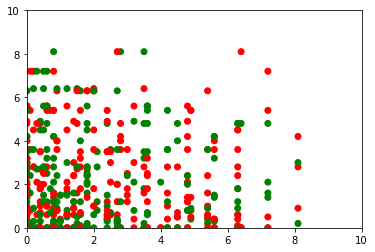

In [234]:
import pandas as pd
from numpy import random
import matplotlib
from matplotlib import pyplot as plt
x1=[(random.randint(0,10)*.1*random.randint(0,10)) for i in range(500)]
x2=[(random.randint(0,10)*.1*random.randint(0,10)) for i in range(500)]
y=[random.randint(0,2) for i in range(500)]
data=list(zip(x1,x2,y))
df=pd.DataFrame(data=data,columns=['x1','x2','y'])
colors=['red','green']
plt.scatter(x1,x2,c=y,cmap=matplotlib.colors.ListedColormap(colors))
plt.axis([0,10,0,10])
plt.show()


In [235]:
import numpy as np
X=np.ones((3,500))
X[1]=x1
X[2]=x2
X=X.T
Y=np.array(y)
Y=Y.reshape((500,1))
from sklearn.cross_validation import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.25)
#theta 3X1 train  500X3

In [236]:
import math
def returnroundedhofx(y):
    for i in range(y.size):
        if(y[i]>=0.5):
            y[i]=1
        else:
            y[i]=0
    return y
def calculatehofx(Xtheta):
    for i in range(Xtheta.size):
        Xtheta[i]=1/(1+(math.exp(-1*Xtheta[i])))
    return Xtheta
def costfunction(X,Y):
    cost=0
    for i in range(X.size):
        if Y[i]==1:
            a=math.log(X[i])
        else:
            a=math.log(1-X[i])
        cost=cost+Y[i]*(a)+(1-Y[i])*(a)
    cost=(-1)*cost/(X.size)
    return cost
def gradientdescent(X, Y,alpha, iterations):
    cost_history=[0]*iterations
    m=X.size
    theta=np.zeros((3,1))
    for i in range(iterations):
        Xtheta =X.dot(theta)#500X1
        hofx=calculatehofx(Xtheta)
        loss = hofx-Y
        gradient = X.T.dot(loss)/m   #1 by 1 matrix
        theta = theta - alpha*gradient
        cost = costfunction(hofx, Y)
        cost_history[i] = cost
    print("minimum cost",cost_history[iterations-1])
    return theta, cost_history
it=10000
theta,cost_his=gradientdescent(xtrain,ytrain,0.01,it)

minimum cost [ 0.68785858]


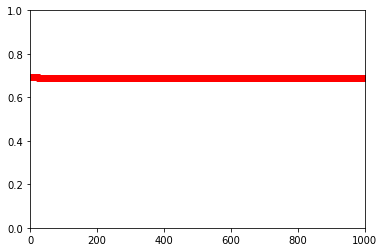

In [237]:
#plotting the graph
counter=[i for i in range(it)]
plt.plot(counter,cost_his,'ro')
plt.axis([0,1000,0,1])
plt.show()

In [238]:
result=np.array((125,1))
result=xtest.dot(theta)
result=calculatehofx(result)
result=returnroundedhofx(result)
from sklearn.metrics import confusion_matrix,accuracy_score 
print(accuracy_score(ytest,result))

0.456
